In [1]:
%matplotlib inline

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as py
import os
# File to Load (Remember to change these)
city_data_to_load = os.path.join("data","city_data.csv")
ride_data_to_load = os.path.join("data","ride_data.csv")

# Read the City and Ride Data
CityData = pd.read_csv(city_data_to_load)
RideData= pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
AllData= pd.merge(RideData, CityData, on='city')

# Display the data table for preview
AllData.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


# Bubble Plot of Ride Sharing Data

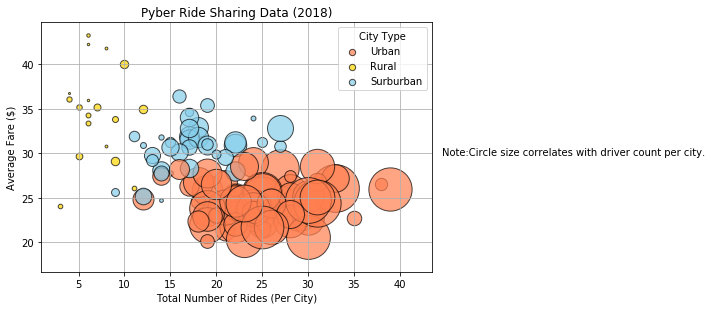

In [108]:
# Obtain the x and y coordinates for each of the three city types
x=AllData.groupby('city').aggregate({'city':'count'})
y=AllData.groupby('city').aggregate({'fare':'mean'})
s=AllData.groupby('city').aggregate({'driver_count':'sum'})
c=AllData.groupby('city').aggregate({'type':'max'})
data=pd.merge(x,y, left_index=True, right_index=True)
data=pd.merge(data,s, left_index=True, right_index=True)
data=pd.merge(data,c, left_index=True, right_index=True)

#make plot
for index, row in data.iterrows():
    if row['type']=='Urban':
        u=plt.scatter(x=row['city'],y=row['fare'],s=row['driver_count'], c='coral',label=row['type'], alpha=.7,edgecolors='black')
    elif row['type']=='Rural':
        r=plt.scatter(x=row['city'],y=row['fare'],s=row['driver_count'], c='gold',label=row['type'], alpha=.7, edgecolors='black')
    else:
        s=plt.scatter(x=row['city'],y=row['fare'],s=row['driver_count'], c='skyblue',label=row['type'], alpha=.7, edgecolors='black')


# Incorporate the other graph properties
plt.grid(True)
plt.tight_layout()
plt.title("Pyber Ride Sharing Data (2018)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.figtext(1,.5,'Note:Circle size correlates with driver count per city.')

# Create a legend
lgnd =plt.legend((u,r,s),('Urban','Rural','Surburban'),scatterpoints=1,title='City Type')

# Incorporate a text label regarding circle size
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

# Save Figure
plt.savefig('bubbleplot.png')

#https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend
    

# Total Fares by City Type

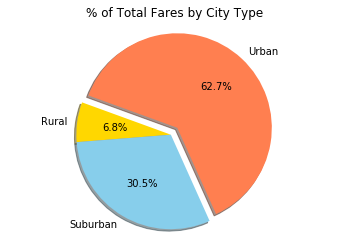

In [125]:
# Calculate Type Percents
total_fare= AllData['fare'].sum()
FaresByCity=pd.DataFrame((AllData.groupby('type').sum()['fare']/total_fare)*100)
FaresByCity=FaresByCity.reset_index()
colors=['gold', 'skyblue', 'coral']
# Build Pie Chart
plt.pie(FaresByCity['fare'],labels=FaresByCity['type'],explode=(0,0,.1),startangle=160, shadow=True, colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig('PercentTotalFares.png')


In [126]:
# Show Figure
plt.show()

# Total Rides by City Type

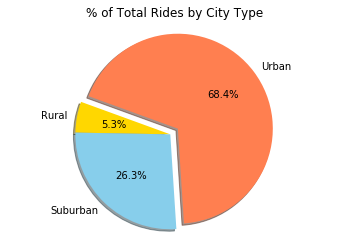

In [130]:
# Calculate Ride Percents
total_rides=AllData['city'].count()
RidesByCity=(AllData.groupby('type').count()['city']/total_rides)*100
RidesByCity=RidesByCity.reset_index()
# Build Pie Chart
plt.pie(RidesByCity['city'],labels=RidesByCity['type'],explode=(0,0,.1),startangle=160, shadow=True, colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig('PercentRideCount.png')


In [132]:
# Show Figure
plt.show()

# Total Drivers by City Type

Text(0.5, 1.0, '% of Total Drivers by City Type')

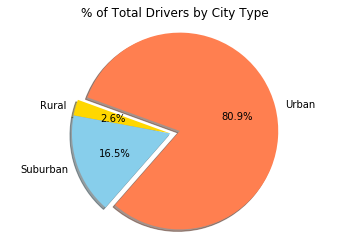

In [152]:
# Calculate Driver Percents
total_Drivers=CityData['driver_count'].sum()
DriverByCity =pd.DataFrame((CityData.groupby('type').sum()['driver_count']/total_Drivers)*100)
DriverByCity=DriverByCity.reset_index()
# Build Pie Charts
plt.pie(DriverByCity['driver_count'],labels=DriverByCity['type'],explode=(0,0,.1),startangle=160, shadow=True, colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title('% of Total Drivers by City Type')
# Save Figure


In [153]:
# Show Figure
plt.show()

# Observations

1.Urban city areas are by far the major revenue generator. is not surprising. would be usefule to compare it to iteself over time to see if there is any growth and expansion going on.
2.the more drivers there are the higher the number of rides. surface level that would make sense but i would want to see if there is a market saturation point for drivers. where it could lead to the point of drivers leaving in mass exodus or could cost money to have the lower performes just lingering around which would hurt the bottom line.
3.rual drivers as infrequent as they are some of the highest average rate of fares. i would want to see if the rates are higher out there or are these longer fares.